### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import the dataset from the google drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
phyto = pd.read_csv('gdrive/My Drive/Phytoplankton.csv')
phyto.head(3)

,Phytoplankton Monitoring Programme results,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Sample number,Production area,Bed ID,Local authority,Grid reference\r\n\r\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \r\ncells L-1\r\n(PSP),Dinophysiaceae \r\ncells L-1\r\n(DSP),Prorocentrum lima \r\ncells L-1\r\n(DSP),Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP),Ligulodinium polyedrum \r\ncells L-1\r\n(Yesso...,Protoceratium reticulatum \r\ncells L-1\r\n(Ye...,Prorocentrum cordatum \r\ncells L-1\r\n(Veneru...,NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,ND,ND,ND,ND,ND,ND,ND,NaN,NaN


### Read the datset in csv format with pandas

### Create a new header for the dataset by specify the column to use as header

In [4]:
new_header = phyto.iloc[0] #grab the first row for the header
phyto = phyto[1:] #take the data less the header row
phyto.columns = new_header #set the header row as the df header
phyto = phyto[:828]

In [5]:
phyto.columns

Index([                                           'Sample number',
                                                'Production area',
                                                         'Bed ID',
                                                'Local authority',
                      'Grid reference\r\n\r\nNote 1             ',
                                                 'Sampling point',
                                          'Date sample collected',
                        'Alexandrium spp. \r\ncells L-1\r\n(PSP)',
                          'Dinophysiaceae \r\ncells L-1\r\n(DSP)',
                       'Prorocentrum lima \r\ncells L-1\r\n(DSP)',
                  'Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ',
           'Ligulodinium polyedrum \r\ncells L-1\r\n(Yessotoxin)',
       'Protoceratium reticulatum \r\ncells L-1\r\n(Yessotoxin) ',
            'Prorocentrum cordatum \r\ncells L-1\r\n(Venerupin) ',
                                                              

## Rename columns

In [6]:
phyto = phyto.rename({'Sample number': 'sample_number', 
                      'Production area': 'production_area',
                      'Bed ID' : 'bed_id',
                      'Local authority' : 'local_authority',
                      'Grid reference\r\n\r\nNote 1             ' : 'grid_reference',
                      'Sampling point' : 'sampling_point',
                      'Date sample collected' : 'date_sample_collected',
                      'Alexandrium spp. \r\ncells L-1\r\n(PSP)' : 'alexandrium_spp',
                      'Dinophysiaceae \r\ncells L-1\r\n(DSP)' : 'dinophysiaceae',
                      'Prorocentrum lima \r\ncells L-1\r\n(DSP)' : 'prorocentrum_lima',
                      'Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ' : 'pseudonitzschia_spp',
                      'Ligulodinium polyedrum \r\ncells L-1\r\n(Yessotoxin)' : 'ligulodinium_polyedrum',
                      'Protoceratium reticulatum \r\ncells L-1\r\n(Yessotoxin) ' : 'protoceratium_reticulatum',
                      'Prorocentrum cordatum \r\ncells L-1\r\n(Venerupin) ' : 'prorocentrum_cordatum'}, 
                     axis=1)

phyto.head(3)

,sample_number,production_area,bed_id,local_authority,grid_reference,sampling_point,date_sample_collected,alexandrium_spp,dinophysiaceae,prorocentrum_lima,pseudonitzschia_spp,ligulodinium_polyedrum,protoceratium_reticulatum,prorocentrum_cordatum,NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,44201.4375,ND,ND,ND,400,ND,ND,ND,NaN,NaN


## Data cleaning
### Four independent features are selected for cleaning. Missing and not detected values were replaced, and the errors were cast

In [7]:
def clean_data(phyto):
    phyto['alexandrium_spp'] = phyto['alexandrium_spp'].replace('ND', 0)
    phyto['pseudonitzschia_spp'] = phyto['pseudonitzschia_spp'].replace('ND', 0)
    phyto['dinophysiaceae'] = phyto['dinophysiaceae'].replace('ND', 0)
    phyto['prorocentrum_lima'] = phyto['prorocentrum_lima'].replace('ND', 0)
    phyto['ligulodinium_polyedrum'] = phyto['ligulodinium_polyedrum'].replace('ND', 0)
    phyto['protoceratium_reticulatum'] = phyto['protoceratium_reticulatum'].replace('ND', 0)
    phyto['prorocentrum_cordatum'] = phyto['prorocentrum_cordatum'].replace('ND', 0)

    phyto['alexandrium_spp'] = pd.to_numeric(phyto['alexandrium_spp'], errors='coerce')
    phyto['pseudonitzschia_spp'] = pd.to_numeric(phyto['pseudonitzschia_spp'], errors='coerce')
    phyto['dinophysiaceae'] = pd.to_numeric(phyto['dinophysiaceae'], errors='coerce')                                                    
    phyto['prorocentrum_lima'] = pd.to_numeric(phyto['prorocentrum_lima'], errors='coerce')
    phyto['ligulodinium_polyedrum'] = pd.to_numeric(phyto['ligulodinium_polyedrum'], errors='coerce')
    phyto['protoceratium_reticulatum'] = pd.to_numeric(phyto['protoceratium_reticulatum'], errors='coerce')
    phyto['prorocentrum_cordatum'] = pd.to_numeric(phyto['prorocentrum_cordatum'], errors='coerce')
                                                                  
    
    return phyto

cleaned_phyto = clean_data(phyto)

cleaned_phyto.head()

,sample_number,production_area,bed_id,local_authority,grid_reference,sampling_point,date_sample_collected,alexandrium_spp,dinophysiaceae,prorocentrum_lima,pseudonitzschia_spp,ligulodinium_polyedrum,protoceratium_reticulatum,prorocentrum_cordatum,NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,44201.4375,0.0,0.0,0.0,400.0,0.0,0.0,0.0,NaN,NaN
4,4/21,Porlock,B094D,Somerset West and Taunton Council,SS87114787,Porlock East,44201.4583333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5,5/21,Blackwater,B14AD,Maldon DC,TM04060768,St Peters Flats,44202.4375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [8]:
phyto.columns

Index([            'sample_number',           'production_area',
                          'bed_id',           'local_authority',
                  'grid_reference',            'sampling_point',
           'date_sample_collected',           'alexandrium_spp',
                  'dinophysiaceae',         'prorocentrum_lima',
             'pseudonitzschia_spp',    'ligulodinium_polyedrum',
       'protoceratium_reticulatum',     'prorocentrum_cordatum',
                               nan,                         nan],
      dtype='object', name=0)

## Data labelling
### A dictionary was created to map the each column to a threshold. A thresold reach is created for each of the feature and add to the dataframe as the target feature

In [9]:
thresholds = {'alexandrium_spp' : 40, 
              'dinophysiaceae' : 100, 
              'prorocentrum_lima' : 100, 
              'pseudonitzschia_spp' : 150000,
              'ligulodinium_polyedrum'  : 10000,
              'protoceratium_reticulatum' : 1500,
              'prorocentrum_cordatum' : 100}

thresholds

{'alexandrium_spp': 40,
 'dinophysiaceae': 100,
 'prorocentrum_lima': 100,
 'pseudonitzschia_spp': 150000,
 'ligulodinium_polyedrum': 10000,
 'protoceratium_reticulatum': 1500,
 'prorocentrum_cordatum': 100}

In [10]:
def check_thresholds(cleaned_phyto):
    
    t = []
    
    for i,j in enumerate(cleaned_phyto["sample_number"]):
        alexandrium = cleaned_phyto.iloc[i]["alexandrium_spp"]
        pseudo_nitzschia = cleaned_phyto.iloc[i]["pseudonitzschia_spp"]
        dinophysiaceae = cleaned_phyto.iloc[i]["dinophysiaceae"]
        prorocentrum = cleaned_phyto.iloc[i]["prorocentrum_lima"]
        ligulodinium_polyedrum = cleaned_phyto.iloc[i]["ligulodinium_polyedrum"]
        protoceratium_reticulatum = cleaned_phyto.iloc[i]["protoceratium_reticulatum"]
        prorocentrum_cordatum = cleaned_phyto.iloc[i]["prorocentrum_cordatum"]
        threshold_reached = 0
        
        if pseudo_nitzschia >= thresholds['pseudonitzschia_spp']:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds['dinophysiaceae']:
            threshold_reached = 1
        elif prorocentrum >= thresholds['prorocentrum_lima']:
            threshold_reached = 1
        elif alexandrium >= thresholds['alexandrium_spp']:
            threshold_reached = 1
        elif ligulodinium_polyedrum >= thresholds['ligulodinium_polyedrum']:
            threshold_reached = 1
        elif protoceratium_reticulatum >= thresholds['protoceratium_reticulatum']:
            threshold_reached = 1
        elif prorocentrum_cordatum >= thresholds['prorocentrum_cordatum']:
            threshold_reached = 1

        t.append(threshold_reached)

    return t

thresholds_reached = check_thresholds(cleaned_phyto)
cleaned_phyto['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(cleaned_phyto, 'thresholds_cleaned.csv', sep=',', index=False)

### The independent (x) and dependent (y) variables are split into training and test data
### Feature scaling was done to standardized the data

In [11]:
x = pd.read_csv('thresholds_cleaned.csv', usecols=['alexandrium_spp','dinophysiaceae',         
                                                    'prorocentrum_lima','pseudonitzschia_spp',    
                                                    'ligulodinium_polyedrum','protoceratium_reticulatum',
                                                    'prorocentrum_cordatum'], na_values = ['no info', '.'])

y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [12]:
## Splitting the dataset into the Training and Test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [14]:
model = Sequential()

model.add(Dense(units = 500, activation='relu', input_shape=(7,)))
model.add(Dropout(0.4))
model.add(Dense(units = 100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4000      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 54,201
Trainable params: 54,201
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(
    x_train, y_train, 
    batch_size = 32, 
    epochs = 20, 
    verbose = 1, 
    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
21/21 [==============================] - 3s 12ms/step - loss: nan - accuracy: 0.8565 - val_loss: nan - val_accuracy: 0.8614
Epoch 2/20
21/21 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 5/20
21/21 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 6/20
21/21 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.8550 - val_loss: nan - val_accuracy: 0.8614
Epoch 8/20
21/21 [==============================] - 0s 5ms/st

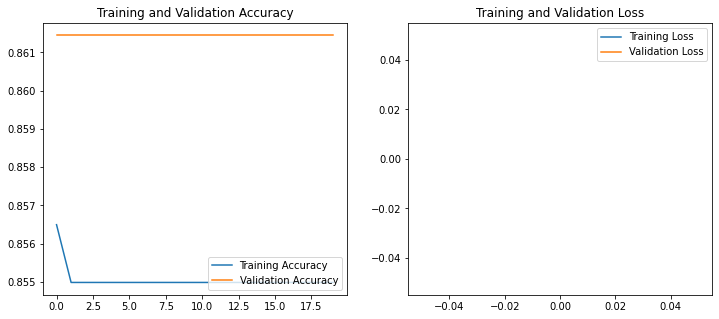

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()